In [1]:
# Caz - insurance                     

# Random forest regresion               padurea aleatoare, se antreneaza multi arbori, generati aleatoriu
                                       # fiecare arbore analizeaza citeva coloane aleatorii si rinduri aleatorii, rindurile nu trebuie sa  se repete  

    
# comparam cu metoda decision tree, KNN si linear Regresion  toate pe regresie 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor         # Algoritmul de random forest pe regresie
from sklearn.tree import DecisionTreeRegressor             # Algoritmul de copac pe regresie 
 
from sklearn.linear_model import LinearRegression        # Algoritmul de Liniar regresion 
from sklearn.neighbors import KNeighborsRegressor           # algoritmul KNN pe regresie 

from sklearn.metrics import  mean_absolute_error  
from sklearn.model_selection import train_test_split 

In [2]:
t = pd.read_csv('insurance.csv')   # incarcam datele din fisier in variabila t
print (t)
print (t.info())         # info descpre fiecare tip de date din coloana
print (t.isna().sum())   # sa vedem daca sunt valori lipsa


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

In [3]:
# avem 3 coloane cu tipul de date object - text
# trebuie sa transformam valorile numere 

print (t['sex'].value_counts())

print (t['smoker'].value_counts())

print (t['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [4]:
# cimpurile sex si smoker au doar 2 categorii de valor, deci facem mapare
t['sex']= t['sex'].map ( {'male' : 0,   'female' : 1}   )  
t['smoker']= t['smoker'].map ( {'no' : 0,   'yes' : 1}   )  

t

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [5]:
# cimpul region are 4 categorii de date si facem dumies - se vor adauga 4 coloane noi si 2 vor fi sterse 

t = pd.get_dummies(t, columns=['region'], drop_first=True)    
t

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0
1334,18,1,31.920,0,0,2205.98080,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,1


In [6]:
t = t.sample(frac=1)            # am amestecat rindurile, inregistrarile 
t

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
512,51,0,22.42,0,0,9361.32680,0,0,0
1131,27,0,45.90,2,0,3693.42800,0,0,1
495,20,0,27.93,0,0,1967.02270,0,0,0
873,43,0,30.10,1,0,6849.02600,0,0,1
676,55,1,40.81,3,0,12485.80090,0,1,0
...,...,...,...,...,...,...,...,...,...
628,58,0,38.00,0,0,11365.95200,0,0,1
314,27,1,31.40,0,1,34838.87300,0,0,1
819,33,1,35.53,0,1,55135.40209,1,0,0
38,35,0,36.67,1,1,39774.27630,0,0,0


In [7]:
X = t.drop (['charges'], axis = 1).values        # separam datele in X datele de analizat si Y rezultatele,
                                                # axis = 1 stergem dupa coloane, axxis =0 ama sterge rinduri 
y = t['charges'].values


X_antrenat,X_testat,y_antrenat,y_testat = train_test_split (X,y,random_state = 42 )  # impartim datele pe antenare si testare


In [8]:
# Modelul 1 Liniar Regression 
print ('  Modelul Liniar Regression  ')

regresia_liniara = LinearRegression()                         # alegem algoritmul Liniar Regression

regresia_liniara.fit (X_antrenat, y_antrenat)              # antrenam modelul pe Liniar Regresion

prezicerea = regresia_liniara.predict (X_testat )          # facem prezicerea pe X_testatre
   
    

eroarea_absoluta_lr = mean_absolute_error (prezicerea, y_testat)             #  calculam eroarea absoluta  la  regresie 
print ('\n Eroarea absoluta = ', eroarea_absoluta_lr)                                                                     



  Modelul Liniar Regression  

 Eroarea absoluta =  4316.591066164107


In [9]:
# Modelul 2 KNN  Regression 
print ('  Modelul KNN Regression  ')

knn_regresie = KNeighborsRegressor()                        # alegem algoritmulKNN Regression

knn_regresie.fit (X_antrenat, y_antrenat)              # antrenam modelul pe KNN Regresion

prezicerea = knn_regresie.predict (X_testat )          # facem prezicerea pe X_testatre
   
    

eroarea_absoluta_knn = mean_absolute_error (prezicerea, y_testat)             #  calculam eroarea absoluta  la  regresie 
print ('\n Eroarea absoluta = ', eroarea_absoluta_knn)                                                                     


  Modelul KNN Regression  

 Eroarea absoluta =  8169.056349270449


In [10]:
# Modelul 3 Decision Tree Regression 
print ('  Modelul Decision Tree Regression  ')

tree = DecisionTreeRegressor()                 # alegem algoritmul Tree Regression

tree.fit (X_antrenat, y_antrenat)              # antrenam modelul pe Tree Regresion

prezicerea = tree.predict (X_testat )          # facem prezicerea pe X_testare
       

eroarea_absoluta_tree = mean_absolute_error (prezicerea, y_testat)             #  calculam eroarea absoluta  la  regresie 

print ('\n Eroarea absoluta = ', eroarea_absoluta_tree)                                                                     


  Modelul Decision Tree Regression  

 Eroarea absoluta =  2861.194073325373


In [11]:
# Modelul 4  Random Forest Regression 
print ('  Modelul Random Tree Regression  ')

forest = RandomForestRegressor()                 # alegem algoritmul Random Forest Regression

forest.fit (X_antrenat, y_antrenat)              # antrenam modelul pe Random Forest Regresion

prezicerea = forest.predict (X_testat )          # facem prezicerea pe X_testare
       

eroarea_absoluta_forest = mean_absolute_error (prezicerea, y_testat)             #  calculam eroarea absoluta  la  regresie 

print ('\n Eroarea absoluta = ', eroarea_absoluta_forest)                                                                     


  Modelul Random Tree Regression  

 Eroarea absoluta =  2761.622106969184


In [12]:
# definim o functie care deseneaza graficul pentru 1 coloana aleasa - alcool  si coloana cu rezultatele y 

def grafic (X, y, algoritm): 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    algoritm.fit (X_train, y_train)
    
    y_pred = algoritm.predict(X_test)
    
    plt.scatter(X_test.reshape(-1, 1), y_test)
    
    x_min, x_max = np.min(X_test), np.max(X_test)
    
    X_pred = np.linspace(x_min, x_max, 100)
    
    plt.plot(X_pred, algoritm.predict(X_pred.reshape(-1, 1)), c='red')
    
    plt.show()

Regresia Liniara - eroare absoluta   4316.591066164107


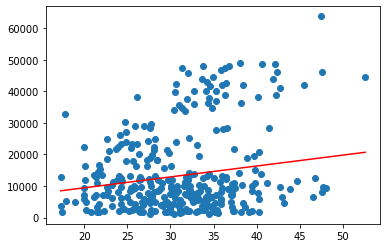

Regresia KNN - eroarea absoluta   8169.056349270449


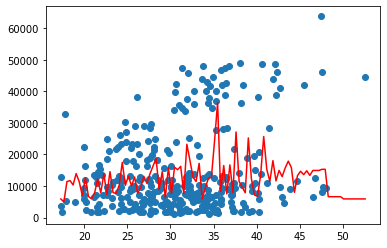

Regresie Tree Decision - eroarea absoluta  2861.194073325373


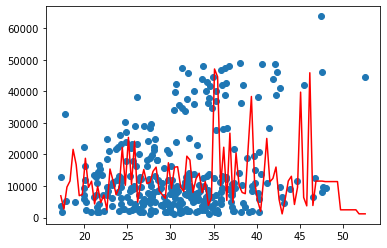

Regresie Random Forest - eroarea absoluta   2761.622106969184


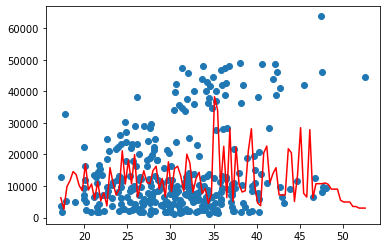

In [13]:
print ('Regresia Liniara - eroare absoluta  ', eroarea_absoluta_lr )
grafic (t[['bmi']].values, y, regresia_liniara)


print ('Regresia KNN - eroarea absoluta  ', eroarea_absoluta_knn)
grafic (t[['bmi']].values, y, knn_regresie)

print ('Regresie Tree Decision - eroarea absoluta ', eroarea_absoluta_tree)
grafic (t[['bmi']].values, y, tree)

print ('Regresie Random Forest - eroarea absoluta  ', eroarea_absoluta_forest)
grafic (t[['bmi']].values, y, forest)

In [14]:
# Cea mai buna metoda pe regresie in acest caz este Random Forest 